<a href="https://colab.research.google.com/github/Austin-Faulkner/JSON_Format/blob/master/CS4347_Assignment1_a_f408.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1 - Linear Regression
> **FULL MARKS = 25*4 = 100**

In this assignment, you are going to implement your own Simple Linear Regression function. Please notice no library versions of linear regression are allowed. Follow the instructions, you will need to fill the blanks to make it functional.

> **Note**

This assignment is adapted from the coursera online machine learning course. You can refer it here: https://www.coursera.org/learn/machine-learning

**Some useful links**
* loss functions: https://heartbeat.fritz.ai/5-regression-loss-functions-all-machine-learners-should-know-4fb140e9d4b0

In [59]:
from google.colab import drive

drive.mount('/content/drive', force_remount=True)

# enter the foldername in your Drive where you have saved the unzipped
# 'cs4347' folder containing the '.py', 'classifiers' and 'datasets'
# folders.
# e.g. 'assignments/cs4347/'
FOLDERNAME = 'ML/cs4347'

assert FOLDERNAME is not None, "[!] Enter the foldername."

%cd drive/My\ Drive
%cp -r $FOLDERNAME ../../
%cd ../../

Mounted at /content/drive
/content/drive/My Drive
/content


In [60]:
# load required library
import matplotlib.pyplot as plt
import numpy as np

Load data
________

This data contains two columns ['population','profit'], we are trying to predict the relationship between 'population','profit'.


In [61]:
from cs4347.assignment_datasets import assign1
data = assign1()

Visualize data
___________

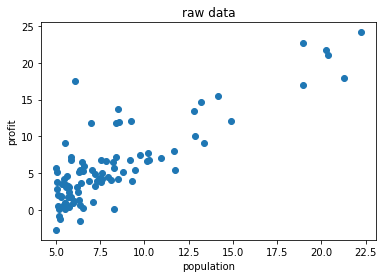

In [62]:
# draw the raw data plot
def draw_data(data):
    # parse data
    x = data['population']
    y = data['profit']

    #########################################################################
    # TODO:                                                                 #
    # 1. make a scatter plot of the raw data                                #
    # 2. set title for the plot                                             #
    # 3. set label for x,y axis                                             #
    # e.g.,                                                                 #
    #https://matplotlib.org/3.2.0/api/_as_gen/matplotlib.pyplot.scatter.html#
    #########################################################################

    plt.scatter(x, y)
    plt.title('raw data')
    plt.xlabel('population')
    plt.ylabel('profit')

    #########################################################################
    #                       END OF YOUR CODE                                #
    #########################################################################

    # return the plt object
    return plt

plt = draw_data(data)
plt.show()

Cost function / Loss function / Objective function
___________
Source: https://www.hackerearth.com/blog/developers/gradient-descent-algorithm-linear-regression/

In [63]:
# define cost_function j
def cost_function(theta, x, y):
    #########################################################################
    # TODO:                                                                 #
    # 1. implement the L2 Loss function                                     #
    # 2. Average the cost over the dataset size                             #
    # Hint: Use numpy functions                                             #
    #########################################################################
    
    m = len(y)
    # formula for prediction = theta0 + theta1.x
    predictions = x.dot(theta)   
    # formula for square error = ((theta1.x + theta0) - y)**2
    square_error = (predictions - y)**2
    # sum of square error function
    j = 1/(2*m) * np.sum(square_error)

    #j = np.sum((x.dot(theta)) - y)**2) * (1 / (2*len(y)))
   
    #########################################################################
    #                       END OF YOUR CODE                                #
    #########################################################################
  # return the cost
    return j


Gradient descent:
_________________
Source: https://www.hackerearth.com/blog/developers/gradient-descent-algorithm-linear-regression/

In [64]:
# gradient descent function
def gradient_descent(theta, x, y):
    # define your learning_rate and epoch
    lr = 0.01
    epoch = 1000
    
    # define cost
    cost = []
    
    # for loop
    for i in range(epoch):
        #####################################################################
        # TODO:                                                             #
        # 1. update theta using lr                                          #
        # 2. append the updated cost to cost list                           #
        # Hint: Use np.ravel to flatten arrays                              #
        #####################################################################

        theta = np.ravel(theta) 
        
        grad_theta_naught = np.sum(x.dot(theta) - y) / len(y)
        grad_theta_one = (np.sum((x.dot(theta) - y) * x[:,1])) / len(y)

        theta[0] = theta[0] - lr * grad_theta_naught
        theta[1] = theta[1] - lr * grad_theta_one

        cost.append(cost_function(theta, x, y))
        
        #####################################################################
        #                       END OF YOUR CODE                            #
        #####################################################################
        
    # return updated theta and cost
    return theta, cost

Visualiza cost
_________

In [65]:
# draw the cost for each iteration
def draw_iteration(cost, epoch=1000):
    #########################################################################
    # TODO:                                                                 #
    # 1. plot the cost for each iteration                                   #
    # 2. set title and labels for the plot                                  #
    # Hint: Use ply.plot function to plot and range(n)                      #
    #########################################################################
    
    plt.xlabel('iteration')
    plt.ylabel('cost')
    plt.title('A plot of the cost function vs. epoch')

    plt.plot(range(epoch), cost)
      
    #########################################################################
    #                       END OF YOUR CODE                                #
    #########################################################################
    
    # show plot
    plt.show()

In [66]:
# draw the simple linear regression model
def draw_final(theta, data):
    # draw the raw data first
    plt = draw_data(data)
    
    # define range of x
    x = np.arange(4,25,0.01)
    # draw the straight line using the final version of theta
    # y = a * x + b
    y = theta[0] + x * theta[1]
    
    # make plot and show
    plt.plot(x, y, c = 'r')
    plt.title('final')
    plt.show()

Call function
_____________

   population   profit
0      6.1101  17.5920
1      5.5277   9.1302
2      8.5186  13.6620
3      7.0032  11.8540
4      5.8598   6.8233


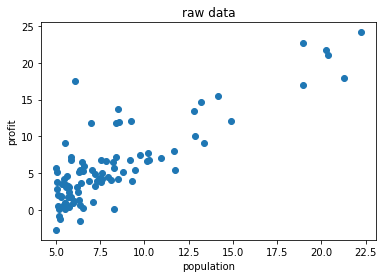

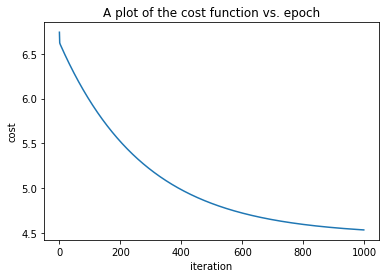

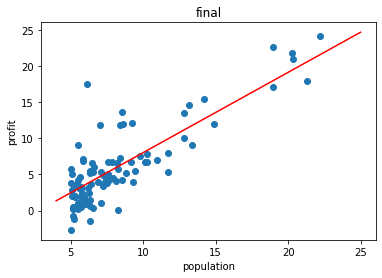

In [67]:
# read the data
# 'population','profit'
data = assign1()
# print head to check if data is correct
print(data.head())

# draw raw data
plt = draw_data(data)
plt.show()

x = data['population']
y = data['profit']
x = np.c_[np.ones(x.size), x]
# if you don't understand what does the function c_ do, try c_?
# c_?

# initialize theta
theta = np.ones(x.shape[1])

# calculate cost j by calling the function
j = cost_function(theta, x, y)

# gradient descent to find the optimal fit
theta, cost = gradient_descent(theta, x, y)

# draw the cost change for iterations
draw_iteration(cost)

# draw the final linear model
# it is shown as a red line, you can change the color anyway
draw_final(theta, data)